## Sentiment Analysis for NVIDIA Stock Price [Feb 2025 News]

This project explores the relationship between news sentiment and Nvidia’s stock price movements using Natural Language Processing (NLP) and financial data analysis. By leveraging sentiment analysis on news headlines and correlating it with stock price trends, we aim to assess how market sentiment influences Nvidia’s stock performance over time.

Using VADER Sentiment Analysis, we analyze the sentiment scores of news headlines related to Nvidia for February–March 2025. These scores are then aggregated by date and compared against Nvidia’s closing stock prices, enabling us to observe potential correlations between public sentiment and stock fluctuations.

The project demonstrates the use of data engineering, financial analytics, and sentiment-driven market insights, providing valuable takeaways for investors, traders, and financial analysts interested in understanding the impact of news sentiment on stock price movements.

**Importance of the Analysis**
- **Investor Decision-Making:**
    Understanding the correlation between sentiment and stock prices can help traders and investors anticipate potential market movements.
    If positive sentiment is consistently followed by stock price increases, investors might use sentiment analysis as an early indicator.
- **Market Behavior & Sentiment Impact:**
    News sentiment can be a leading indicator of stock price fluctuations.
    Market participants react to both positive and negative news, which can influence trading volumes and price movements.
- **Algorithmic Trading & AI-Based Predictions:**
    The analysis demonstrates how NLP (Natural Language Processing) and sentiment analysis can be integrated into trading algorithms.
    Traders using sentiment-driven models could identify patterns and adjust trading strategies accordingly.

In [1]:
!pip install yfinance
!pip install nltk
!pip install vaderSentiment
!pip install requests

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     ------ --------------------------------- 0.5/3.0 MB 1.4 MB/s eta 0:00:02
     ----------------- ---------------------- 1.3/3.0 MB 2.4 MB/s eta 0:00:01
     ------------------------------- -------- 2.4/3.0 MB 3.3 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 3.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.9-py3-none-any.whl size=1

In [2]:
#Collect Stock Data
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import requests

# Specify the start and end dates
start_date = "2025-02-05"
end_date = datetime.now().strftime('%Y-%m-%d')

# Collect Nvidia stock data from the specified date range
nvidia_stock = yf.Ticker("NVDA")
stock_data = nvidia_stock.history(start=start_date, end=end_date)
stock_data.reset_index(inplace=True)
stock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2025-02-05 00:00:00-05:00,121.760002,125.000000,120.760002,124.830002,262230800,0.0,0.0
1,2025-02-06 00:00:00-05:00,127.419998,128.770004,125.209999,128.679993,251483600,0.0,0.0
2,2025-02-07 00:00:00-05:00,129.220001,130.369995,125.000000,129.839996,228186300,0.0,0.0
3,2025-02-10 00:00:00-05:00,130.089996,135.000000,129.960007,133.570007,216989100,0.0,0.0
4,2025-02-11 00:00:00-05:00,132.580002,134.479996,131.020004,132.800003,178902400,0.0,0.0


In [3]:
stock_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2025-02-05 00:00:00-05:00,121.760002,125.000000,120.760002,124.830002,262230800,0.0,0.0
1,2025-02-06 00:00:00-05:00,127.419998,128.770004,125.209999,128.679993,251483600,0.0,0.0
2,2025-02-07 00:00:00-05:00,129.220001,130.369995,125.000000,129.839996,228186300,0.0,0.0
3,2025-02-10 00:00:00-05:00,130.089996,135.000000,129.960007,133.570007,216989100,0.0,0.0
4,2025-02-11 00:00:00-05:00,132.580002,134.479996,131.020004,132.800003,178902400,0.0,0.0
5,2025-02-12 00:00:00-05:00,130.020004,132.240005,129.080002,131.139999,160278600,0.0,0.0
6,2025-02-13 00:00:00-05:00,131.559998,136.500000,131.169998,135.289993,197430000,0.0,0.0
7,2025-02-14 00:00:00-05:00,136.479996,139.250000,135.500000,138.850006,195479600,0.0,0.0
8,2025-02-18 00:00:00-05:00,141.270004,143.440002,137.929993,139.399994,219176600,0.0,0.0
9,2025-02-19 00:00:00-05:00,139.509995,141.360001,137.220001,139.229996,167536000,0.0,0.0


In [6]:
api_key = 'd01f63658d1948638be9ba9d136dd117'


url = 'https://newsapi.org/v2/everything'
params = {
    'q': 'Nvidia',
    'from': (datetime.now() - timedelta(days=28)).strftime('%Y-%m-%d'),  # Get articles from the last 30 days
    'sortBy': 'relevancy',
    'apiKey': api_key,
    'pageSize': 100,  # Maximum number of results per page
    'language': 'en'
}

# Make the request
response = requests.get(url, params=params)
data = response.json()

# Check for errors
if data['status'] != 'ok':
    raise Exception(f"NewsAPI error: {data['message']}")

# Extract articles
articles = data['articles']

# Convert to DataFrame
news_data = pd.DataFrame(articles)
news_data = news_data[['publishedAt', 'title']]
news_data.columns = ['date', 'headline']

In [7]:
news_data

,date,headline
0,2025-02-19T13:57:42Z,Nvidia GeForce RTX 5070 Ti review: a cheaper R...
1,2025-02-19T21:24:22Z,Volvo’s ES90 sedan will be built with a Nvidia...
2,2025-02-10T17:54:29Z,Here’s How One OEM Is Fighting Against Nvidia ...
3,2025-03-04T22:51:17Z,Nvidia’s GeForce RTX 5070 Founders Edition car...
4,2025-02-26T01:06:27Z,Razer’s new Blade 18 offers Nvidia RTX 50-seri...
...,...,...
83,2025-03-03T13:47:00Z,Three AI stocks to play if you want to look pa...
84,2025-03-04T14:00:33Z,Nvidia GeForce RTX 5070 Isn’t a Miracle Worker...
85,2025-02-24T17:50:21Z,Nvidia-Backed Cohere's Revenue Surpasses $70 M...
86,2025-02-11T16:19:17Z,AI chip startup Positron raises $23.5 million ...


In [8]:
# Preprocess news headlines
nltk.download('punkt_tab')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text)
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

news_data['cleaned_headline'] = news_data['headline'].apply(preprocess_text)

# Perform sentiment analysis
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

news_data['sentiment_score'] = news_data['cleaned_headline'].apply(get_sentiment_score)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\jorda\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jorda\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [9]:
news_data

,date,headline,cleaned_headline,sentiment_score
0,2025-02-19T13:57:42Z,Nvidia GeForce RTX 5070 Ti review: a cheaper R...,Nvidia GeForce RTX Ti review cheaper RTX,0.0000
1,2025-02-19T21:24:22Z,Volvo’s ES90 sedan will be built with a Nvidia...,Volvo sedan built Nvidia supercomputer,0.0000
2,2025-02-10T17:54:29Z,Here’s How One OEM Is Fighting Against Nvidia ...,One OEM Fighting Nvidia RTX Scalpers,-0.3612
3,2025-03-04T22:51:17Z,Nvidia’s GeForce RTX 5070 Founders Edition car...,Nvidia GeForce RTX Founders Edition cards laun...,0.0000
4,2025-02-26T01:06:27Z,Razer’s new Blade 18 offers Nvidia RTX 50-seri...,Razer new Blade offers Nvidia RTX GPUs dual mo...,0.0000
...,...,...,...,...
83,2025-03-03T13:47:00Z,Three AI stocks to play if you want to look pa...,Three AI stocks play want look past Nvidia har...,0.4019
84,2025-03-04T14:00:33Z,Nvidia GeForce RTX 5070 Isn’t a Miracle Worker...,Nvidia GeForce RTX Miracle Worker Solid Card G...,0.6597
85,2025-02-24T17:50:21Z,Nvidia-Backed Cohere's Revenue Surpasses $70 M...,Cohere Revenue Surpasses Million AI Startup We...,0.2960
86,2025-02-11T16:19:17Z,AI chip startup Positron raises $23.5 million ...,AI chip startup Positron raises million seed r...,0.0000


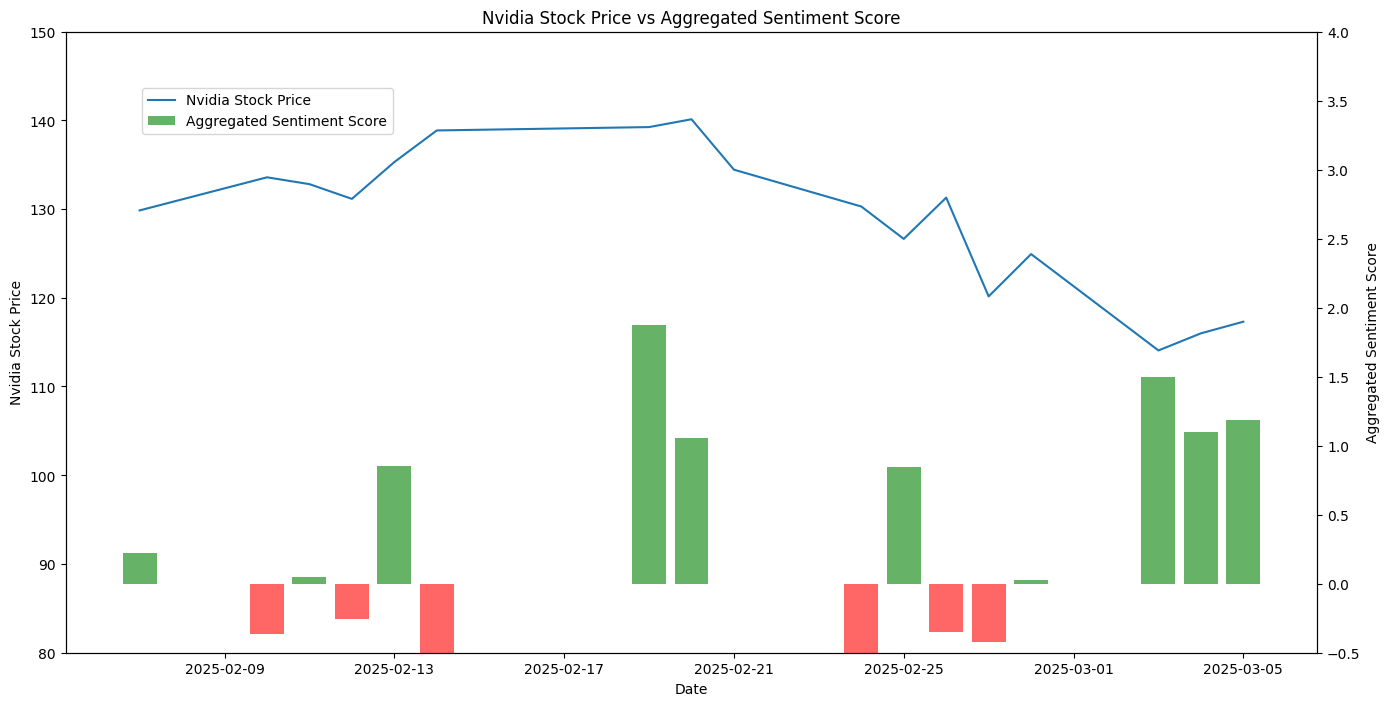

In [10]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

news_data['sentiment_score'] = news_data['cleaned_headline'].apply(get_sentiment_score)

# Convert dates to datetime format
news_data['date'] = pd.to_datetime(news_data['date']).dt.date
stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.date

# Aggregate sentiment scores by date
aggregated_sentiment = news_data.groupby('date')['sentiment_score'].sum().reset_index()

# Merge stock data with aggregated sentiment scores
combined_data = pd.merge(stock_data, aggregated_sentiment, left_on='Date', right_on='date', how='inner')

# Visualize the data with a secondary y-axis and bar plot for aggregated sentiment scores
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.set_xlabel('Date')
ax1.set_ylabel('Nvidia Stock Price')
ax1.plot(combined_data['Date'], combined_data['Close'], label='Nvidia Stock Price')
ax1.tick_params(axis='y')
ax1.set_ylim(80, 150)  # Set the left y-axis range

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Aggregated Sentiment Score')

# Use different colors for positive and negative bar values
colors = ['green' if val >= 0 else 'red' for val in combined_data['sentiment_score']]
ax2.bar(combined_data['Date'], combined_data['sentiment_score'], label='Aggregated Sentiment Score', color=colors, alpha=0.6)
ax2.tick_params(axis='y')
ax2.set_ylim(-0.5, 4)  # Set the right y-axis range

fig.tight_layout()
plt.title('Nvidia Stock Price vs Aggregated Sentiment Score')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.show()
     

The graph visualizes Nvidia’s stock price (line plot) against aggregated sentiment scores derived from news headlines (bar chart). The blue line represents Nvidia's stock price, while the green and red bars indicate positive and negative sentiment scores, respectively.

- X-Axis: Date (showing the stock movement over time).
- Left Y-Axis: Nvidia’s stock price (ranging from 80 to 150).
- Right Y-Axis: Aggregated sentiment score (ranging from -0.5 to 4).
- Green bars: Positive sentiment days.
- Red bars: Negative sentiment days.

### **Key Observations + Findings**

- **Stock Price Trends & Sentiment Alignment:**  
  - Nvidia’s stock price shows noticeable fluctuations over time, peaking around mid-February, declining shortly after, and stabilizing by early March.  
  - Aggregated sentiment scores reveal significant variations, with large positive spikes on February 17 and March 1-5, and negative spikes on February 13 and February 25.

- **Influence of News Sentiment on Stock Movements:**  
  - **Positive sentiment** aligns with stock price increases, suggesting that favorable news coverage may contribute to upward momentum.  
  - **Negative sentiment** coincides with price drops, indicating that negative news can lead to market sell-offs or investor hesitation.

- **Timing of Market Reactions:**  
  - While there is a general correlation between sentiment and stock price movements, the market's reaction is not always immediate. Some shifts in sentiment lead directly to price changes, while others show a lag, possibly due to delayed investor responses or varying market conditions.

- **Practical Implications for Trading:**  
  - Aggregating daily sentiment scores offers a clear trend of public perception, providing an additional tool for anticipating potential price movements.  
  - These findings suggest that sentiment analysis can be integrated into trading models to refine buy/sell strategies and support more informed decision-making.

### **Conclusion**

The analysis demonstrates that news sentiment plays a significant role in stock market behavior, though its impact is not always immediate. By integrating sentiment analysis into financial models, traders and investors can better anticipate market trends and make data-driven decisions. Future improvements—such as incorporating social media sentiment, advanced NLP models, and additional financial indicators—could further enhance the accuracy of sentiment-based stock market predictions.



### **Future Improvements**

 **1. Enhance Sentiment Analysis**  
- Incorporate **advanced NLP techniques** such as **BERT** or **LSTM models** to achieve a deeper understanding of sentiment beyond simple polarity scores.  

 **2. Expand Data Sources**  
- Analyze **social media sentiment** (e.g., **Twitter, Reddit**) alongside **news sentiment** to create a more comprehensive sentiment model.  

 **3. Backtest Trading Strategies**  
- Utilize **historical sentiment data** to test whether a **sentiment-based trading approach** could yield profitable market insights.  

 **4. Factor in External Market Influences**  
- Integrate **additional financial variables** such as:  
  - **Earnings reports**  
  - **Federal Reserve decisions**  
  - **Global economic indicators**  
- This would improve **sentiment-based forecasting and stock price predictions**.   